In [2]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn import datasets
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, recall_score, roc_curve, auc, precision_score, plot_confusion_matrix, classification_report, log_loss, roc_auc_score

In [4]:
# Load the breast cancer dataset from sklearn
data = datasets.load_breast_cancer()

# Create a DataFrame (df) using the dataset's data and feature names
df=pd.DataFrame(data=data.data, columns=data.feature_names)
# Add a new column 'Target' to the DataFrame and assign the target values from the dataset
df['Target'] = data.target

# Display information about the DataFrame, including data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

##### We know that the "target" column is what we need to predict

In [7]:
# Display the distribution of values in the 'Target' column as a percentage using value_counts
df['Target'].value_counts(normalize=True)

1    0.627417
0    0.372583
Name: Target, dtype: float64

In [39]:
# Separate features (X) and target variable (y)
X= df.drop('Target', axis=1)
y=df.Target

# Split the dataset into training and testing sets
# The random_state parameter ensures reproducibility, and test_size specifies the proportion of the test set
X_train,X_test,y_train,y_test = train_test_split(X, y,random_state=0, test_size=0.2)

# Print the lengths of the training and testing sets
print(len(X_train))
print(len(X_test))

455
114


In [40]:
# Create a StandardScaler object
sc = StandardScaler()

# Scale the features in the training set and create a new DataFrame
X_train_scaled = pd.DataFrame(sc.fit_transform(X_train), index=X_train.index, columns = X_train.columns)
# Scale the features in the testing set and create a new DataFrame
X_test_scaled = pd.DataFrame(sc.fit_transform(X_test), index=X_test.index, columns = X_test.columns)

# Display descriptive statistics of the scaled features in the training set
X_train_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,455.0,-9.135549e-16,1.001101,-2.019404,-0.687387,-0.235736,0.455191,3.963628
mean texture,455.0,-3.341893e-15,1.001101,-2.272988,-0.742077,-0.096977,0.586637,3.528104
mean perimeter,455.0,3.216963e-15,1.001101,-1.977589,-0.688384,-0.240394,0.487177,3.980919
mean area,455.0,-2.201902e-15,1.001101,-1.426379,-0.657734,-0.313102,0.300976,5.163006
mean smoothness,455.0,-1.456222e-15,1.001101,-3.176344,-0.708300,-0.034339,0.651954,3.503046
mean compactness,455.0,5.348591e-16,1.001101,-1.664312,-0.736771,-0.218871,0.515151,4.125777
mean concavity,455.0,6.871182e-16,1.001101,-1.125696,-0.740318,-0.351724,0.477578,4.366097
mean concave points,455.0,4.450652e-16,1.001101,-1.262871,-0.725457,-0.396317,0.658928,3.955644
mean symmetry,455.0,-5.669702e-15,1.001101,-2.738225,-0.697504,-0.063546,0.532045,4.496561
mean fractal dimension,455.0,6.715019e-16,1.001101,-1.865718,-0.702216,-0.165610,0.459085,5.105021


In [41]:
# Create a Logistic Regression model with no regularization
logistic = LogisticRegression(penalty='none', random_state=0).fit(X_train_scaled, y_train)

# Make predictions on the test set
logistic_prediction = logistic.predict(X_test_scaled)

# Get predicted probabilities for the positive class (class 1) on the test set
logistic_prep_prob = logistic.predict_proba(X_test_scaled)[:,1]

In [43]:
def plot_roc_curve(fpr, tpr, roc_auc):
    # Set the title of the plot
    plt.title('Receiver Operating Characteristic')
    # Plot the ROC curve with the AUC value as a label
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    # Add a legend to the plot
    plt.legend(loc = 'lower right')
    # Plot a diagonal dashed red line representing random guessing
    plt.plot([0, 1], [0, 1],'r--')
    
    # Set the x-axis and y-axis limits
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    
    # Label the y-axis as 'True Positive Rate'
    plt.ylabel('True Positive Rate')
    # Label the x-axis as 'False Positive Rate'
    plt.xlabel('False Positive Rate')
    
    # Display the plot
    plt.show()

In [44]:
def eval_model(model, x_test, y_test):
    
    # Make predictions and obtain predicted probabilities
    preds = model.predict(x_test)
    probs = model.predict_proba(x_test)

    # Calculate and display confusion matrix and various metrics
    conf_mat = confusion_matrix(y_test, preds)
    accuracy = accuracy_score(y_test, preds)
    recall = recall_score(y_test, preds)
    precision = precision_score(y_test, preds)
    f1 = f1_score(y_test, preds)

    # Plot confusion matrix
    plot_confusion_matrix(model, x_test, y_test)
    plt.show()

    # Print metrics
    print("\n")
    print("Accuracy: ", accuracy)
    print("Precision: ", precision)
    print("Recall: ", recall)
    print("F1: ", f1)

    #Show ROC Curve 
    fpr, tpr, threshold = roc_curve(y_test, probs[:,1], pos_label=1)
    roc_auc = auc(fpr, tpr)
    print("AUC: ", roc_auc)

    # Plot ROC curve
    plot_roc_curve(fpr, tpr, roc_auc)

    # Create a DataFrame to store true class, predicted class, and default probability
    results_df = pd.DataFrame()
    results_df['true_class'] = y_test
    results_df['predicted_class'] = list(preds)
    results_df['default_prob'] = probs[:, 1]

    # Plot the distribution of probabilities for the estimated classes 
    sns.distplot(results_df[results_df['true_class'] == 0]['default_prob'], label="No Default", hist=False)
    sns.distplot(results_df[results_df['true_class'] == 1]['default_prob'], label="Default", hist=False)
    plt.title('Distribution of Probabilities for Estimated Classes')
    plt.legend(loc='best')
    plt.show()
    
    # Display the percentage of true class versus predicted class
    print(results_df.groupby('true_class')['predicted_class'].value_counts(normalize=True))

/Users/trystangeoffre/anaconda3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


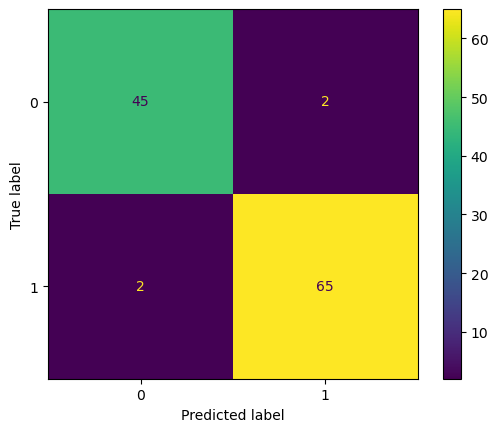



Accuracy:  0.9649122807017544
Precision:  0.9701492537313433
Recall:  0.9701492537313433
F1:  0.9701492537313433
AUC:  0.9699904731660844


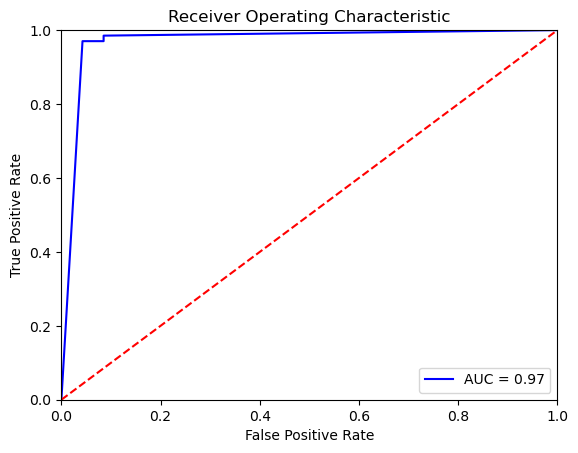

/var/folders/m8/sxy0g5fx4wq4sp521k22jx200000gn/T/ipykernel_81592/1825695334.py:34: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(results_df[results_df['true_class'] == 0]['default_prob'], label="No Default", hist=False)
/var/folders/m8/sxy0g5fx4wq4sp521k22jx200000gn/T/ipykernel_81592/1825695334.py:35: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gi

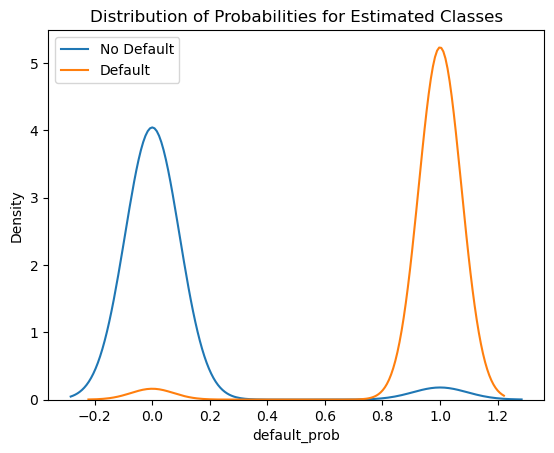

true_class  predicted_class
0           0                  0.957447
            1                  0.042553
1           1                  0.970149
            0                  0.029851
Name: predicted_class, dtype: float64


In [45]:
eval_model(logistic, X_test_scaled, y_test)

In [48]:
# Generate a classification report for the Logistic Regression model
print(classification_report(y_test, logistic_prediction, digits=3))

              precision    recall  f1-score   support

           0      0.957     0.957     0.957        47
           1      0.970     0.970     0.970        67

    accuracy                          0.965       114
   macro avg      0.964     0.964     0.964       114
weighted avg      0.965     0.965     0.965       114



In [60]:
# Create a DataFrame to store variable names and their corresponding coefficients
logisticCoeff = pd.concat([pd.DataFrame(X_test_scaled.columns), pd.DataFrame(np.transpose(logistic.coef_))], axis=1)

# Rename the columns for clarity
logisticCoeff.columns = ['Variable', 'Coefficient']

# Add a new column with the absolute values of the coefficients
logisticCoeff['Coefficient_Abs']=logisticCoeff['Coefficient'].apply(abs)

# Sort the DataFrame based on the absolute values of coefficients in descending order
logisticCoeff.sort_values(by='Coefficient_Abs', ascending=False)



,Variable,Coefficient,Coefficient_Abs
19,fractal dimension error,3690.385838,3690.385838
15,compactness error,-3273.380460,3273.380460
6,mean concavity,-2912.519132,2912.519132
10,radius error,-2910.508755,2910.508755
25,worst compactness,2868.417078,2868.417078
5,mean compactness,2864.037596,2864.037596
13,area error,-2813.260422,2813.260422
17,concave points error,-2779.815540,2779.815540
16,concavity error,2742.665509,2742.665509
29,worst fractal dimension,-2482.463584,2482.463584


# LASSO


/Users/trystangeoffre/anaconda3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


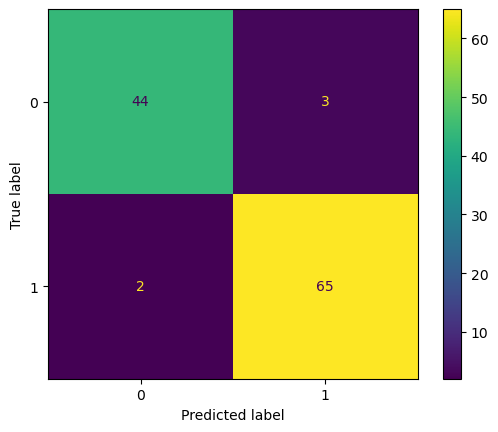



Accuracy:  0.956140350877193
Precision:  0.9558823529411765
Recall:  0.9701492537313433
F1:  0.962962962962963
AUC:  0.994919021911718


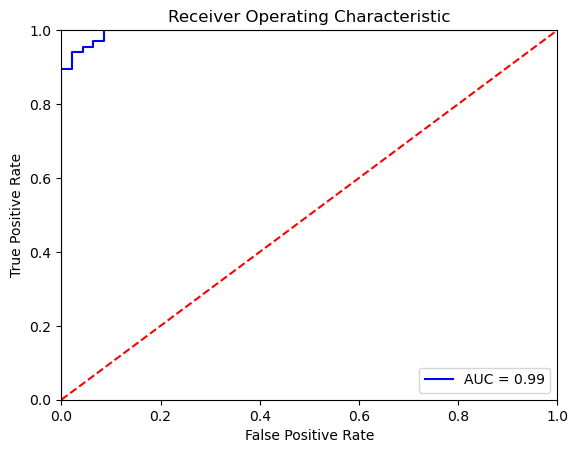

/var/folders/m8/sxy0g5fx4wq4sp521k22jx200000gn/T/ipykernel_81592/1825695334.py:34: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(results_df[results_df['true_class'] == 0]['default_prob'], label="No Default", hist=False)
/var/folders/m8/sxy0g5fx4wq4sp521k22jx200000gn/T/ipykernel_81592/1825695334.py:35: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gi

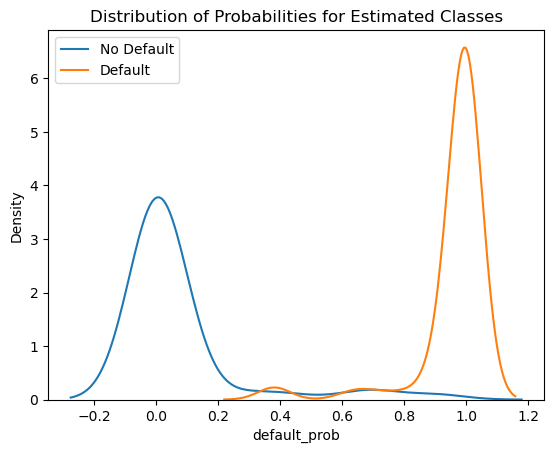

true_class  predicted_class
0           0                  0.936170
            1                  0.063830
1           1                  0.970149
            0                  0.029851
Name: predicted_class, dtype: float64


In [61]:
# Create a Logistic Regression model with L1 regularization (Lasso)
lasso = LogisticRegression(penalty='l1', solver = 'liblinear', random_state=0).fit(X_train_scaled, y_train)

# Evaluate the Lasso model using the eval_model function
eval_model(lasso, X_test_scaled, y_test)

In [62]:
# Create a DataFrame to store variable names and their corresponding coefficients for Lasso model
lassoCoeff = pd.concat([pd.DataFrame(X_test_scaled.columns), pd.DataFrame(np.transpose(lasso.coef_))], axis=1)

# Rename the columns for clarity
lassoCoeff.columns = ['Variable', 'Coefficient']

# Add a new column with the absolute values of the coefficients
lassoCoeff['Coefficient_Abs']=lassoCoeff['Coefficient'].apply(abs)

# Sort the DataFrame based on the absolute values of coefficients in descending order
lassoCoeff.sort_values(by='Coefficient_Abs', ascending=False)

,Variable,Coefficient,Coefficient_Abs
10,radius error,-2.935807,2.935807
23,worst area,-2.636900,2.636900
27,worst concave points,-1.682608,1.682608
21,worst texture,-1.398681,1.398681
20,worst radius,-1.383135,1.383135
26,worst concavity,-0.916756,0.916756
7,mean concave points,-0.833459,0.833459
15,compactness error,0.646466,0.646466
19,fractal dimension error,0.622571,0.622571
28,worst symmetry,-0.497083,0.497083


# Ridge

/Users/trystangeoffre/anaconda3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


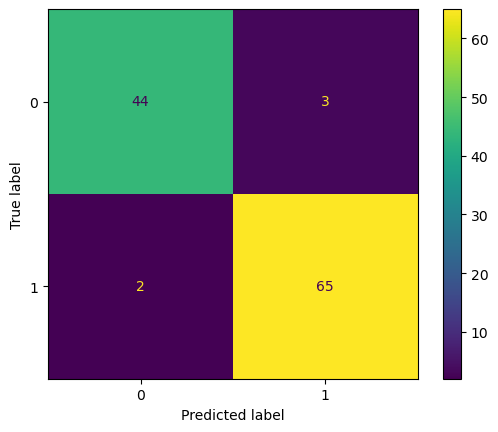



Accuracy:  0.956140350877193
Precision:  0.9558823529411765
Recall:  0.9701492537313433
F1:  0.962962962962963
AUC:  0.9939663385201651


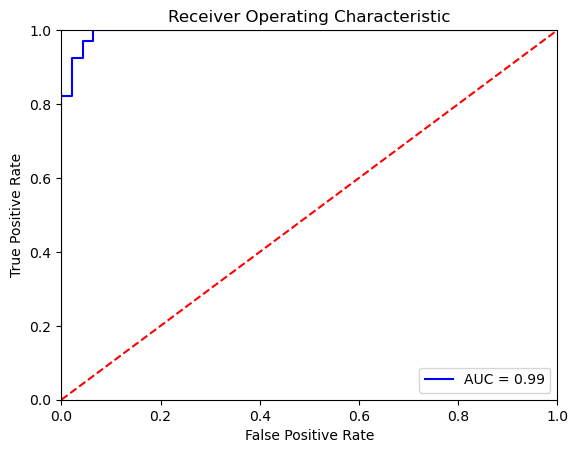

/var/folders/m8/sxy0g5fx4wq4sp521k22jx200000gn/T/ipykernel_81592/1825695334.py:34: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(results_df[results_df['true_class'] == 0]['default_prob'], label="No Default", hist=False)
/var/folders/m8/sxy0g5fx4wq4sp521k22jx200000gn/T/ipykernel_81592/1825695334.py:35: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gi

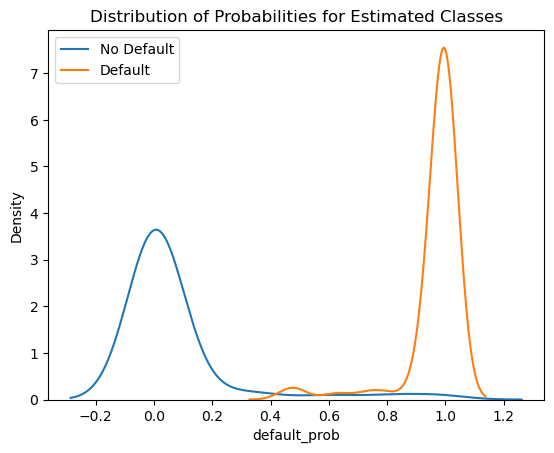

true_class  predicted_class
0           0                  0.936170
            1                  0.063830
1           1                  0.970149
            0                  0.029851
Name: predicted_class, dtype: float64


In [66]:
# Create a Logistic Regression model with L2 regularization (Ridge)
ridge = LogisticRegression(penalty='l2', random_state=0).fit(X_train_scaled, y_train)

# Evaluate the Ridge model using the eval_model function
eval_model(ridge, X_test_scaled, y_test)

In [67]:
# Create a DataFrame to store variable names and their corresponding coefficients for Ridge model
ridgeCoeff = pd.concat([pd.DataFrame(X_test_scaled.columns), pd.DataFrame(np.transpose(ridge.coef_))], axis=1)

# Rename the columns for clarity
ridgeCoeff.columns = ['Variable', 'Coefficient']

# Add a new column with the absolute values of the coefficients
ridgeCoeff['Coefficient_Abs']=ridgeCoeff['Coefficient'].apply(abs)

# Sort the DataFrame based on the absolute values of coefficients in descending order
ridgeCoeff.sort_values(by='Coefficient_Abs', ascending=False)

,Variable,Coefficient,Coefficient_Abs
10,radius error,-1.390506,1.390506
21,worst texture,-1.040541,1.040541
13,area error,-0.978761,0.978761
27,worst concave points,-0.970955,0.970955
20,worst radius,-0.931148,0.931148
23,worst area,-0.900516,0.900516
19,fractal dimension error,0.868327,0.868327
26,worst concavity,-0.866509,0.866509
7,mean concave points,-0.846129,0.846129
12,perimeter error,-0.845077,0.845077


# Elastic Net

/Users/trystangeoffre/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/trystangeoffre/anaconda3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


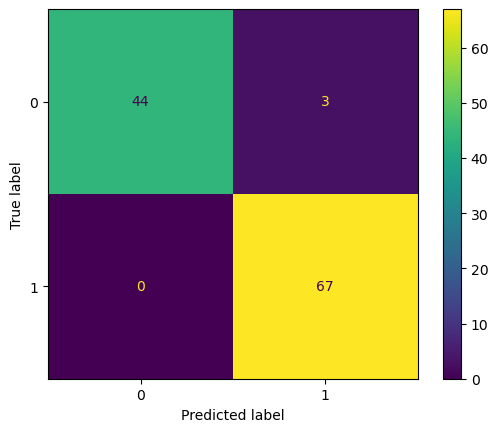



Accuracy:  0.9736842105263158
Precision:  0.9571428571428572
Recall:  1.0
F1:  0.9781021897810218
AUC:  0.9952365830422356


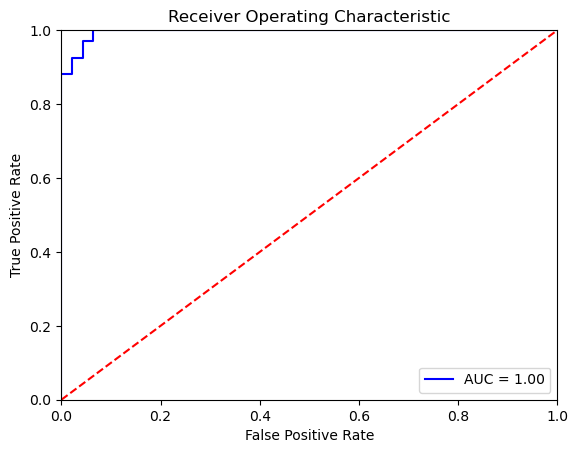

/var/folders/m8/sxy0g5fx4wq4sp521k22jx200000gn/T/ipykernel_81592/1825695334.py:34: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(results_df[results_df['true_class'] == 0]['default_prob'], label="No Default", hist=False)
/var/folders/m8/sxy0g5fx4wq4sp521k22jx200000gn/T/ipykernel_81592/1825695334.py:35: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gi

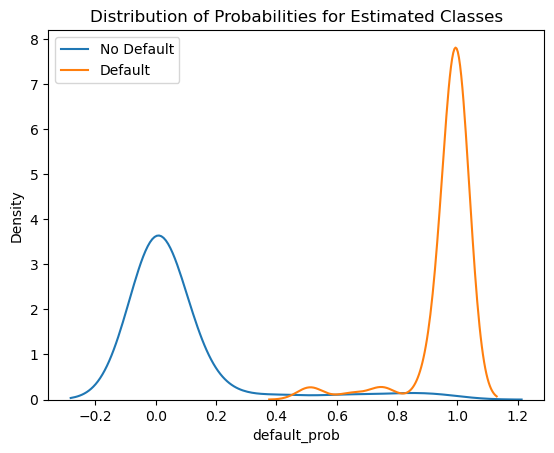

true_class  predicted_class
0           0                  0.93617
            1                  0.06383
1           1                  1.00000
Name: predicted_class, dtype: float64


In [69]:
# Create a Logistic Regression model with elastic net regularization
elasticNet = LogisticRegression(penalty='elasticnet',solver='saga', l1_ratio=0.5, random_state=0).fit(X_train_scaled, y_train)

# Evaluate the Elastic Net model using the eval_model function
eval_model(elasticNet, X_test_scaled, y_test)

In [70]:
# Create a DataFrame to store variable names and their corresponding coefficients for Elastic Net model
elasticNetCoeff = pd.concat([pd.DataFrame(X_test_scaled.columns), pd.DataFrame(np.transpose(elasticNet.coef_))], axis=1)

# Rename the columns for clarity
elasticNetCoeff.columns = ['Variable', 'Coefficient']

# Add a new column with the absolute values of the coefficients
elasticNetCoeff['Coefficient_Abs']=elasticNetCoeff['Coefficient'].apply(abs)

# Sort the DataFrame based on the absolute values of coefficients in descending order
elasticNetCoeff.sort_values(by='Coefficient_Abs', ascending=False)

,Variable,Coefficient,Coefficient_Abs
10,radius error,-1.159761,1.159761
27,worst concave points,-0.954155,0.954155
21,worst texture,-0.936198,0.936198
20,worst radius,-0.855934,0.855934
12,perimeter error,-0.808218,0.808218
23,worst area,-0.806435,0.806435
13,area error,-0.783896,0.783896
22,worst perimeter,-0.746962,0.746962
26,worst concavity,-0.737980,0.737980
7,mean concave points,-0.716209,0.716209
